In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Overview and Cleaning

In [ ]:
berkeley = pd.read_csv('BerkeleyEarthMonthly.csv', skiprows = [1])
climate = pd.read_csv('climate_change_dataset.csv')

In [ ]:
berkeley.head()
#headers need to be fixed

,Berkeley Earth Monthly,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,1850,1,1850.0411,-0.788
1,1850,2,1850.1260,-0.240
2,1850,3,1850.2027,-0.400
3,1850,4,1850.2877,-0.629
4,1850,5,1850.3699,-0.660


In [ ]:
berkeley.info()
#data types need to be changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Berkeley Earth Monthly  2095 non-null   int64  
 1   Unnamed: 1              2095 non-null   int64  
 2   Unnamed: 2              2095 non-null   float64
 3   Unnamed: 3              2095 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 65.6 KB


In [ ]:
# fixing the headers
berkeley.columns = ['Year', 'month', 'DecimalYear', 'Anomaly']

In [ ]:
# changing datatypes
berkeley['Year'] = berkeley['Year'].astype(int)
berkeley['DecimalYear'] = berkeley['DecimalYear'].astype(float)
berkeley['Anomaly'] = berkeley['Anomaly'].astype(float)
berkeley['month'] = berkeley['month'].astype(int)

In [ ]:
berkeley.head()

,Year,month,DecimalYear,Anomaly
0,1850,1,1850.0411,-0.788
1,1850,2,1850.1260,-0.240
2,1850,3,1850.2027,-0.400
3,1850,4,1850.2877,-0.629
4,1850,5,1850.3699,-0.660


In [ ]:
berkeley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2095 non-null   int64  
 1   month        2095 non-null   int64  
 2   DecimalYear  2095 non-null   float64
 3   Anomaly      2095 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 65.6 KB


In [ ]:
climate.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [ ]:
# prepping for merging aggregating by having an anomaly per year
brk = berkeley.groupby('Year')['Anomaly'].mean().reset_index()
brkclimate = pd.merge(climate, brk, on='Year', how='left')
#results
brkclimate.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Anomaly
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,0.681083
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,1.020750
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,0.775000
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7,0.777417
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4,0.696167


# Analysis
Mainly focusing on temperature differences over the years

In [ ]:
# calculating yearly min and max temp
brkclimate['min_temp'] = brkclimate['Avg Temperature (°C)'] - brkclimate['Anomaly']
brkclimate['max_temp'] = brkclimate['Avg Temperature (°C)'] + brkclimate['Anomaly']
brkclimate.head(3)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Anomaly,min_temp,max_temp
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,0.681083,8.218917,9.581083
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,1.020750,29.979250,32.020750
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,0.775000,33.125000,34.675000


In [ ]:
#calculating temperature difference
brkclimate['temp_diff'] = brkclimate['max_temp'] - brkclimate['min_temp']
brkclimate.head()


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Anomaly,min_temp,max_temp,temp_diff
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,0.681083,8.218917,9.581083,1.362167
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,1.020750,29.979250,32.020750,2.041500
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,0.775000,33.125000,34.675000,1.550000
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7,0.777417,5.122583,6.677417,1.554833
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4,0.696167,26.203833,27.596167,1.392333


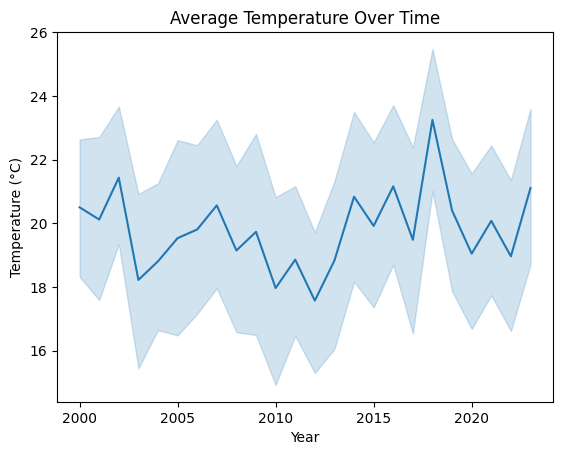

In [ ]:
# trends in temperatures over the years\
sns.lineplot(data = brkclimate, x = 'Year', y = 'Avg Temperature (°C)')
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

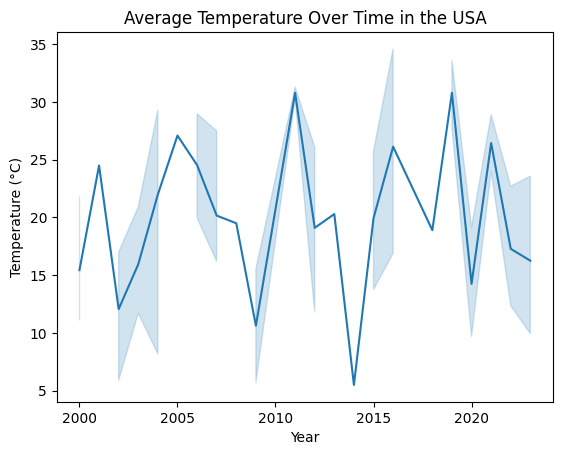

In [ ]:
# temperature trends over time in america
usa_df = brkclimate[brkclimate['Country'] == 'USA']
sns.lineplot(data = usa_df, x = 'Year', y = 'Avg Temperature (°C)')
plt.title('Average Temperature Over Time in the USA')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

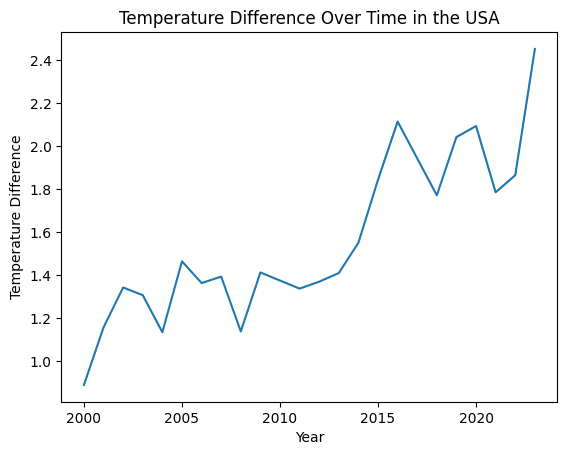

In [ ]:
# temp diff in america
usa_df = brkclimate[brkclimate['Country'] == 'USA']
sns.lineplot(data = usa_df, x = 'Year', y = 'temp_diff')
plt.title('Temperature Difference Over Time in the USA')
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.show()

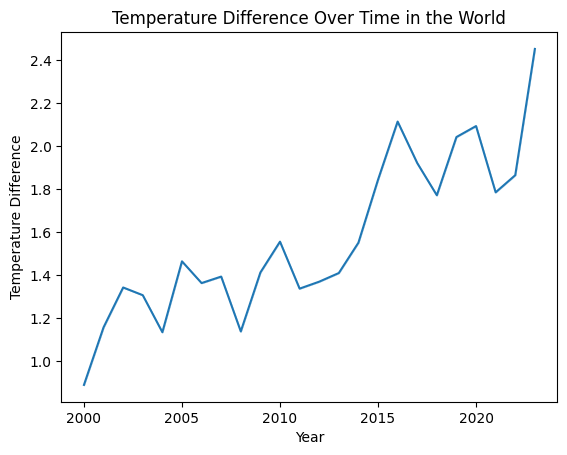

In [ ]:
#temp diff globaly
sns.lineplot(data = brkclimate, x = 'Year', y = 'temp_diff')
plt.title('Temperature Difference Over Time in the World')
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.show()

Spikes and dips meaning


*  spikes meaning warmer temperatures than usual(Heatwaves and droughts)
*  Dips meaning colder temperatures than usual(Winters colder than normal and cooler periods in time)


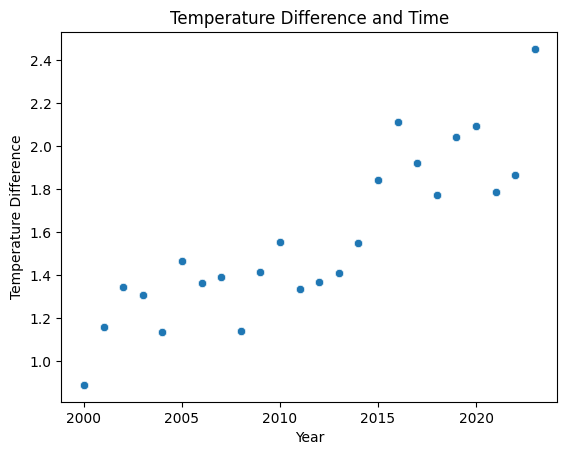

In [ ]:
# calculating relationships between temperature difference and year
sns.scatterplot(data = brkclimate, x = 'Year', y = 'temp_diff')
plt.title('Temperature Difference and Time')
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.show()

In [ ]:
# test with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = brkclimate[['Year']]
y = brkclimate[['temp_diff']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

linereg = LinearRegression()
linereg.fit(X_train, y_train)

y_pred = linereg.predict(X_test)

In [ ]:
# model results
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03456915363069252
R-squared: 0.7219195948201866


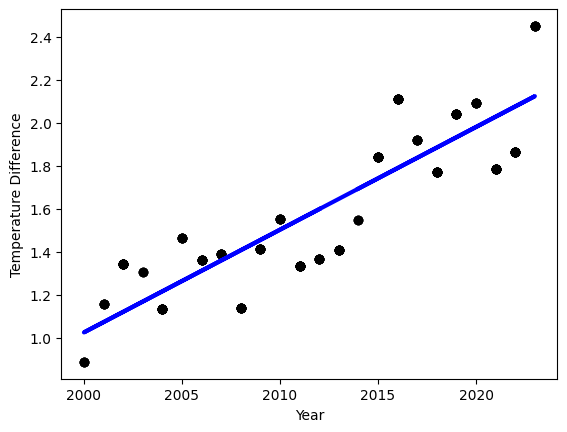

In [ ]:
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.show()

In [ ]:
# random forest test
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = brkclimate[['Year']]
y = brkclimate[['temp_diff']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', rf_mse)
print('R-squared:', rf_r2)

Mean Squared Error: 8.821683591666847e-30
R-squared: 1.0


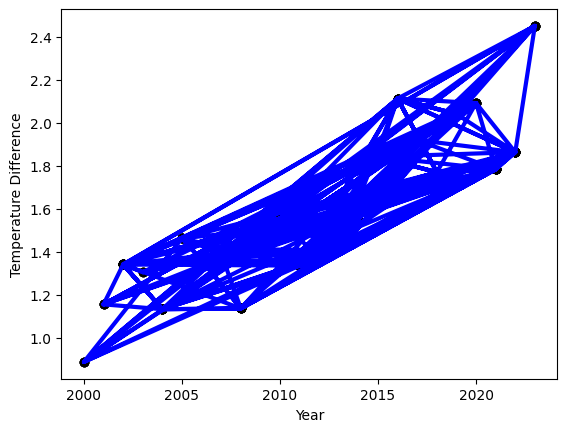

In [ ]:
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'blue', linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Temperature Difference')
plt.show()